In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import yt

%matplotlib inline

In [6]:
bx = np.loadtxt('/Users/willbarnes/Downloads/bsol/bsolution.bx',comments='//').reshape((95,95,95))
by = np.loadtxt('/Users/willbarnes/Downloads/bsol/bsolution.by',comments='//').reshape((95,95,95))
bz = np.loadtxt('/Users/willbarnes/Downloads/bsol/bsolution.bz',comments='//').reshape((95,95,95))

In [11]:
ds = yt.load_uniform_grid(
    dict(Bx=(bx.T,'T'),By=(by.T,'T'),Bz=(bz.T,'T')),
    bx.shape,
    geometry=('cartesian',('x','y','z'))
)

yt : [INFO     ] 2017-10-25 15:54:29,329 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-10-25 15:54:29,330 Parameters: domain_dimensions         = [95 95 95]
yt : [INFO     ] 2017-10-25 15:54:29,331 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-10-25 15:54:29,333 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-10-25 15:54:29,334 Parameters: cosmological_simulation   = 0.0


In [31]:
ds.domain_width

YTArray([ 1.,  1.,  1.]) code_length

yt : [INFO     ] 2017-10-25 17:35:59,486 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-10-25 17:35:59,487 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-10-25 17:35:59,489 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-10-25 17:35:59,490 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-10-25 17:35:59,492 Making a fixed resolution buffer of (('stream', 'Bz')) 800 by 800
yt : [WARNING  ] 2017-10-25 17:35:59,520 Plot image for field ('stream', 'Bz') has both positive and negative values. Min = -0.002926, Max = 0.003175.
yt : [WARNING  ] 2017-10-25 17:35:59,521 Switching to symlog colorbar scaling unless linear scaling is specified later



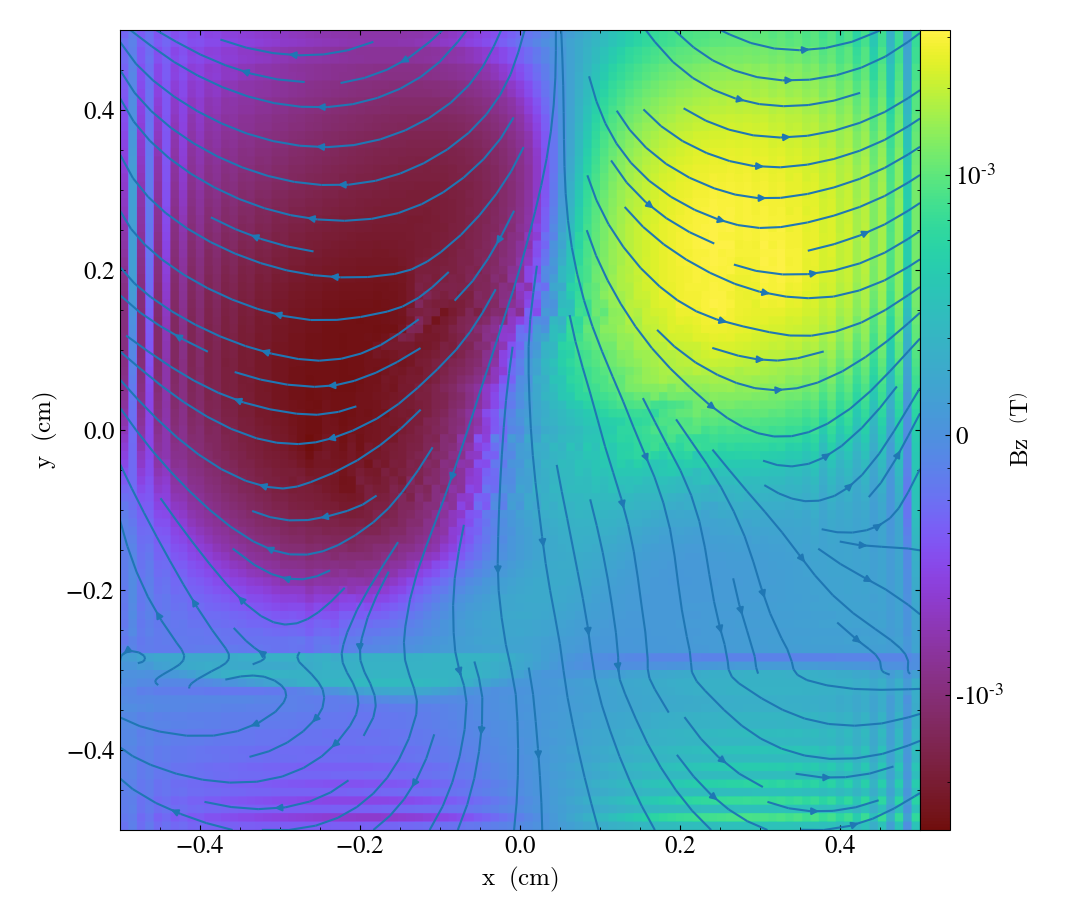

In [55]:
center=ds.domain_center+np.array([0,0,-0.3])*ds.domain_width
p = yt.SlicePlot(ds,'z','Bz',origin='center-domain',center=center)
p.annotate_streamlines('Bz','Bx')

yt : [INFO     ] 2017-10-25 17:50:27,179 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-10-25 17:50:27,179 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-10-25 17:50:27,181 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-10-25 17:50:27,182 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-10-25 17:50:27,184 Making a fixed resolution buffer of (('stream', 'Bx')) 800 by 800
yt : [INFO     ] 2017-10-25 17:50:27,196 Making a fixed resolution buffer of (('stream', 'Bz')) 800 by 800
yt : [INFO     ] 2017-10-25 17:50:27,202 Making a fixed resolution buffer of (('stream', 'By')) 800 by 800
yt : [WARNING  ] 2017-10-25 17:50:27,221 Plot image for field ('stream', 'Bx') has both positive and negative values. Min = -0.038540, Max = 0.022725.
yt : [WARNING  ] 2017-10-25 17:50:27,222 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [WARNING  ] 2017-10-25 17:50:27,395 Plot image for field ('stream', 'Bz') has both positive and negative values. Min = -0.034020, Max = 0.06

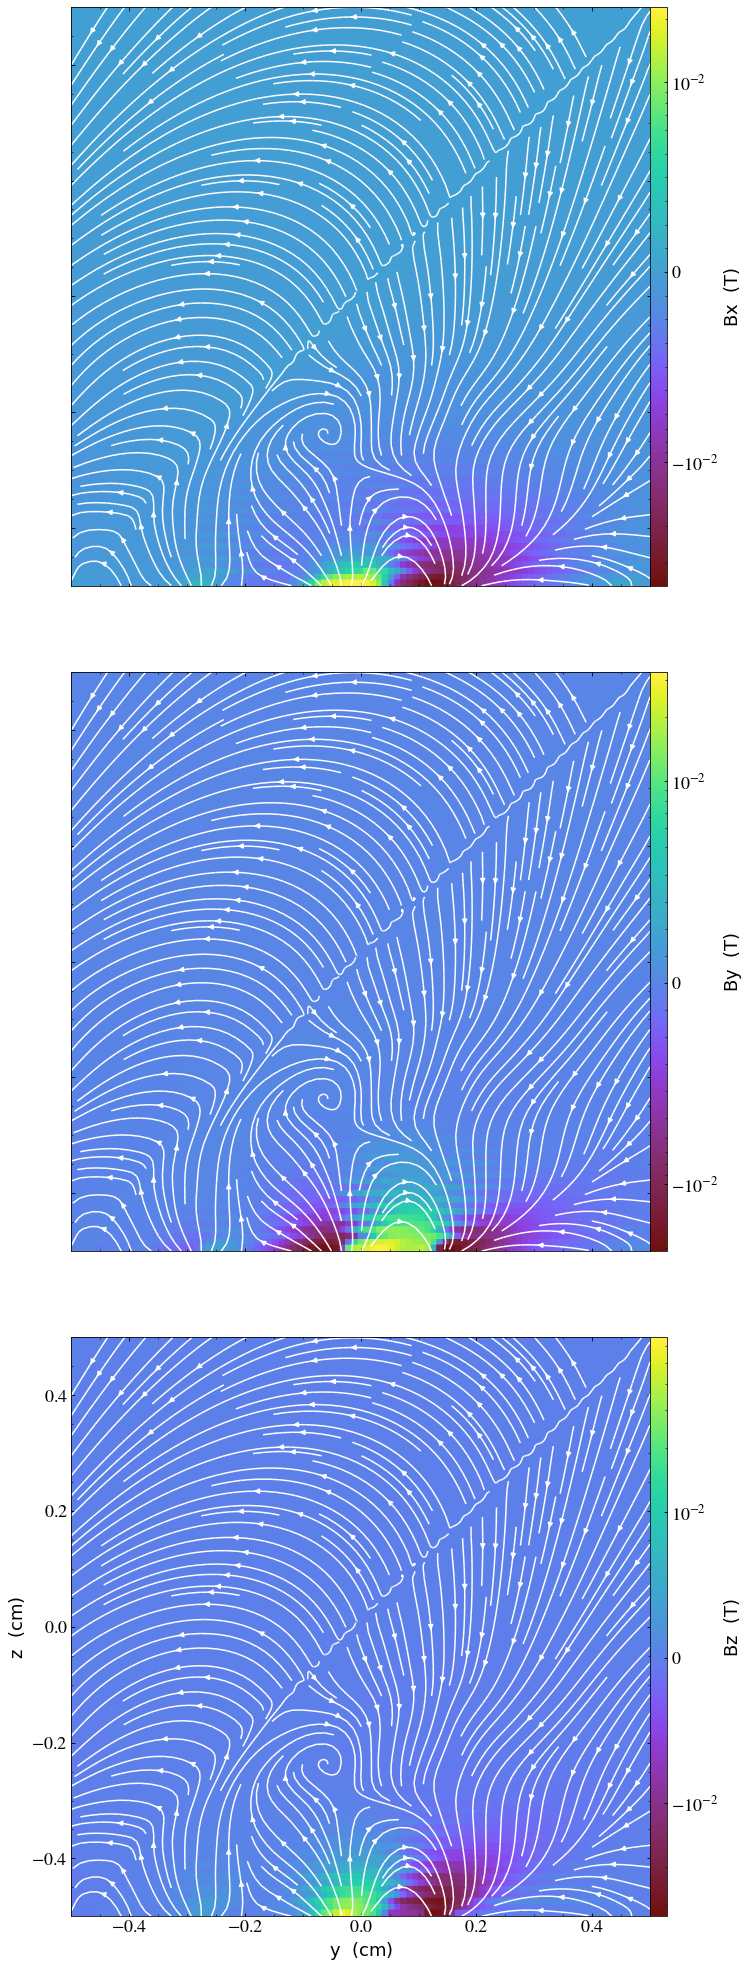

In [75]:
mag_fields = ['Bx','By','Bz']
#dirs = ['x','y','z']
center=ds.domain_center+np.array([0,0,0])*ds.domain_width
fig = plt.figure()
grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                nrows_ncols = (3, 1),
                axes_pad = 1.2,
                label_mode = "1",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")
fig.set_figwidth(20)
p = yt.SlicePlot(ds,'x',mag_fields,
                 origin='center-domain',
                 center=center)
p.annotate_streamlines('By','Bz',plot_args={'color':'w'},density=2)
p.figure_size = 30
for i,b_field in enumerate(mag_fields):
    plot = p.plots[b_field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]
p._setup_plots()